# Tasks for laboratory assignment 2

In [17]:
# imports section

import pandas as pd
import numpy as np
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from autocorrect import Speller
import nltk
from wordcloud import WordCloud

import gensim as gs
from gensim.test.utils import lee_corpus_list
from gensim.models import Word2Vec
import gensim.downloader as api

import matplotlib.pyplot as plt

# Download the necessary resources
nltk.download('punkt')
nltk.download('wordnet')


import json
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import requests

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lysko\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\lysko\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Extract data from the json file 

Write a script, that would extract all the the data from the json file and return it in a list of texts for further use in the next tasks

In [18]:
def extract_texts_from_file(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        data = json.load(file)
        texts = data.get('texts', [])
    return texts

texts = extract_texts_from_file('resources/data.json')
print(texts)

['Oppenheimer, directed by Christopher Nolan, delves into the life of J. Robert Oppenheimer, the theoretical physicist who led the development of the atomic bomb. The film explores his moral and emotional struggles.', "Oppenheimer captures the life of the 'father of the atomic bomb' and his internal conflict after the success of the Manhattan Project. The film's complex narrative reflects on the cost of scientific achievement.", 'In Oppenheimer, Cillian Murphy delivers a riveting performance as the conflicted physicist who grapples with the consequences of his groundbreaking work on the atomic bomb, under the weight of global politics and ethics.', 'Oppenheimer is a cinematic exploration of ambition, guilt, and responsibility. Through stunning visuals and a thought-provoking story, Nolan brings the life of the brilliant but haunted physicist to the big screen.', 'Ducks are versatile waterfowl, known for their adaptability in freshwater and coastal habitats. With webbed feet and waterpr

## Process the texts

Write a script, that would process these texts. Processing should include:

- Lowercasing
- Removing Punctuation
- Removing Special Characters and Numbers
- Stemming or Lemmatization
- Handling Abbreviations
- Spelling Correction

In [19]:
def replace_abbreviations(text):
    abbreviations = {
        "J.": "John",
        "USA": "United States of America",
        "UK": "United Kingdom",
    }

    for abbrev, full in abbreviations.items():
        text = text.replace(abbrev, full)
    return text

def process_texts(texts):
    processed_texts = []
    
    for text in texts:
        text = replace_abbreviations(text)

        text = text.lower()
        text = text.translate(str.maketrans('', '', string.punctuation))
        text = re.sub(r'[^a-z\s]', '', text)
        
        words = text.split()
        stop_words = set(stopwords.words('english'))
        words = [word for word in words if word not in stop_words]
        spell = Speller()
        words = [spell(word) for word in words]
        
        lemmatizer = WordNetLemmatizer()
        words = [lemmatizer.lemmatize(word) for word in words]

        processed_text = ' '.join(words)
        processed_texts.append(processed_text)
    
    return processed_texts 

texts_processed = process_texts(texts)
print(texts_processed)

['oppenheimer directed christopher nolan elf life john robert oppenheimer theoretical physicist led development atomic bomb film explores moral emotional struggle', 'oppenheimer capture life father atomic bomb internal conflict success manhattan project film complex narrative reflects cost scientific achievement', 'oppenheimer million murphy delivers riveting performance conflicted physicist grape consequence groundbreaking work atomic bomb weight global politics ethic', 'oppenheimer cinematic exploration ambition guilt responsibility stunning visuals thoughtprovoking story nolan brings life brilliant haunted physicist big screen', 'duck versatile waterfowl known adaptability freshwater coastal habitat webbed foot waterproof feather excellent swimmer migrating long distance find food warmer climate', 'lamp spider talk yesterday flew nobody noticed except coaster watch blue smell better today door laughing understand whisper secret orange sock', 'duck communicate using range vocalizatio

## Visualize as cloud of words

Visualize the texts as a cloud of words.

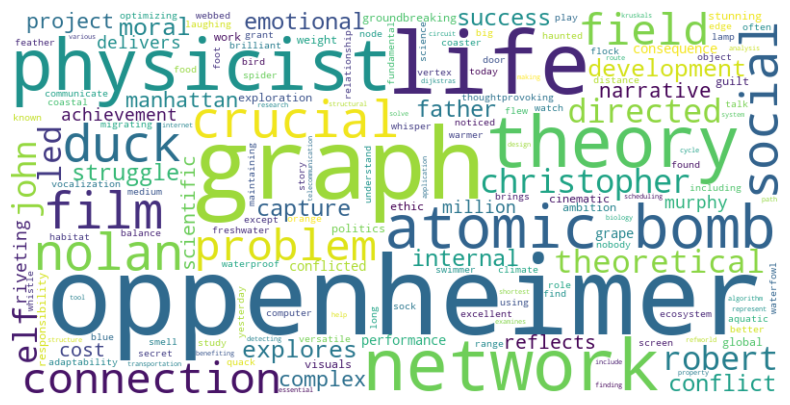

In [20]:
def visualize_texts(texts_processed):
    all_text = ' '.join(texts_processed)
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

visualize_texts(texts_processed)

## Calculate cosine similarities using TFIDF

Calculate the TFIDF score and cosine similarity between the texts. You may use gensim, write your own script using numpy or use other module. Output the result as a matrix $n\times n$ of cosine similarity scores (where $n$ is the length of texts list).

**Extra credit**: use word2vec word embeddings in vector spaces to get better TFIDF scores by representing each word as a vector.

In [21]:
def calcuate_tfidf(texts_processed):
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform(texts_processed)
    cosine_matrix = cosine_similarity(tfidf_matrix)

    return cosine_matrix

cosine_matrix = calcuate_tfidf(texts_processed)
print(cosine_matrix)

[[1.         0.19624538 0.15137509 0.16065874 0.         0.
  0.         0.         0.         0.        ]
 [0.19624538 1.         0.096726   0.06173851 0.         0.
  0.         0.         0.         0.        ]
 [0.15137509 0.096726   1.         0.06120432 0.         0.
  0.         0.         0.         0.        ]
 [0.16065874 0.06173851 0.06120432 1.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         1.         0.
  0.03534903 0.         0.         0.        ]
 [0.         0.         0.         0.         0.         1.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.03534903 0.
  1.         0.03422612 0.0384115  0.        ]
 [0.         0.         0.         0.         0.         0.
  0.03422612 1.         0.12094021 0.1008735 ]
 [0.         0.         0.         0.         0.         0.
  0.0384115  0.12094021 1.         0.18716127]
 [0.         0.         0.         0.

## Visualize data

Visualize the `cosine_matrix` data using matplotlib. Choose your own method of plotting the scores in a way, that the similarity indeces between texts would be instantly visible. Plot data about texts as well (a couple of first words in the document).

*Hint: remember heat maps, aren't they nice for this task?*

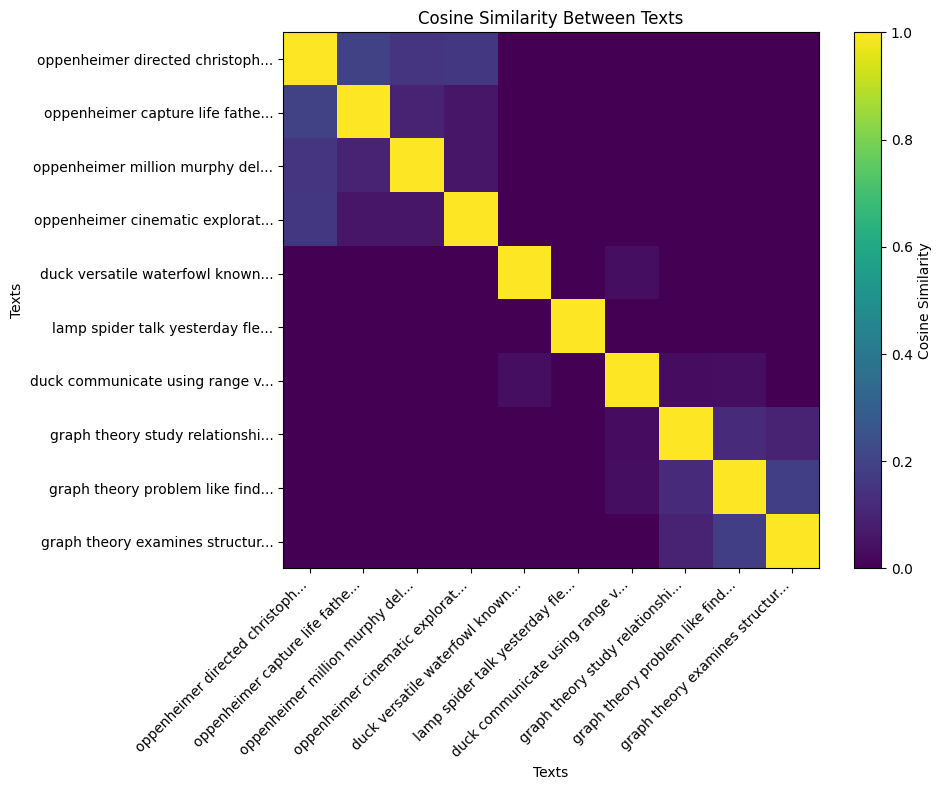

In [22]:
def visualize_data(cosine_matrix, texts_processed):
    fig, ax = plt.subplots(figsize=(10, 8))
    
    cax = ax.imshow(cosine_matrix, cmap='viridis', interpolation='nearest')
    fig.colorbar(cax, label='Cosine Similarity')

    labels = [text[:30] + '...' for text in texts_processed]
    ax.set_xticks(np.arange(len(labels)))
    ax.set_yticks(np.arange(len(labels)))
    ax.set_xticklabels(labels, rotation=45, ha="right")
    ax.set_yticklabels(labels)

    ax.set_title('Cosine Similarity Between Texts')
    ax.set_xlabel('Texts')
    ax.set_ylabel('Texts')
    
    plt.tight_layout()
    plt.show()

visualize_data(cosine_matrix, texts_processed)

## Analyse your own text using TFIDF (or any other method)

Analyse your own text using previous methods. You may use API fetching to get text data, download texts from Kaggle or use any texts you want. Find cosine similarities and visualize them.

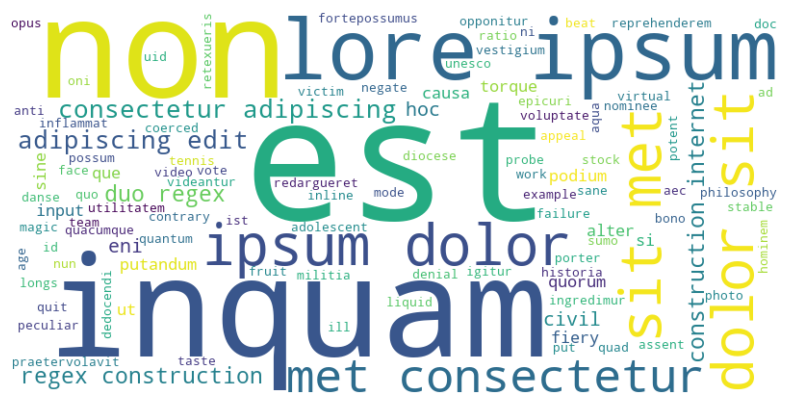

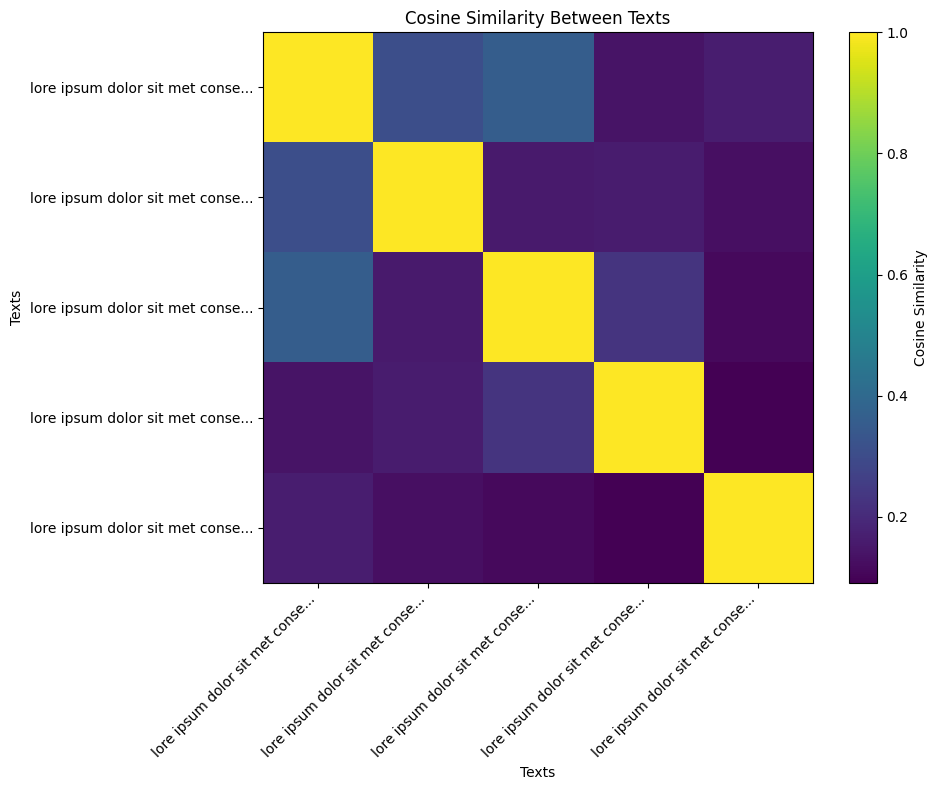

In [23]:
def get_texts():
    texts = []
    for _ in range(5): 
        response = requests.get("https://loripsum.net/api/1/short/plaintext")
        if response.status_code == 200:
            texts.append(response.text)
    return texts

texts = get_texts()
texts_processed = process_texts(texts)
visualize_texts(texts_processed)
cosine_matrix = calcuate_tfidf(texts_processed)
visualize_data(cosine_matrix, texts_processed)